<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [1]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/M_BAJAS.txt',delimiter='~')
data.Fecha = pd.to_datetime(data.FECHA_BAJA)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [4]:
data.head(5)

,ANIO_BAJA,MES_BAJA,FECHA_BAJA,ANTIGUEDAD,CANT
0,2019,11,01/11/2019,1068,3
1,2020,4,01/04/2020,860,1
2,2019,11,05/11/2019,1673,1
3,2020,2,01/02/2020,1419,1
4,2019,8,01/08/2019,782,1


In [5]:
encabezados= ['Año','Mes','Fecha','Antiguedad','Cant_Bajas']
data.columns=encabezados

In [6]:
data.head(5)

,Año,Mes,Fecha,Antiguedad,Cant_Bajas
0,2019,11,01/11/2019,1068,3
1,2020,4,01/04/2020,860,1
2,2019,11,05/11/2019,1673,1
3,2020,2,01/02/2020,1419,1
4,2019,8,01/08/2019,782,1


In [7]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

Año           0
Mes           0
Fecha         0
Antiguedad    0
Cant_Bajas    0
dtype: int64


In [8]:
data.describe(include='all')

,Año,Mes,Fecha,Antiguedad,Cant_Bajas
count,17101.000000,17101.000000,17101,17101.000000,17101.000000
unique,NaN,NaN,315,NaN,NaN
top,NaN,NaN,01/02/2020,NaN,NaN
freq,NaN,NaN,848,NaN,NaN
mean,2019.358459,5.469797,NaN,902.821531,1.561312
std,0.479562,3.262741,NaN,493.846888,1.115205
min,2019.000000,1.000000,NaN,0.000000,1.000000
25%,2019.000000,3.000000,NaN,489.000000,1.000000
50%,2019.000000,5.000000,NaN,847.000000,1.000000
75%,2020.000000,7.000000,NaN,1289.000000,2.000000


In [9]:
data.info 

<bound method DataFrame.info of         Año  Mes       Fecha  Antiguedad  Cant_Bajas
0      2019   11  01/11/2019        1068           3
1      2020    4  01/04/2020         860           1
2      2019   11  05/11/2019        1673           1
3      2020    2  01/02/2020        1419           1
4      2019    8  01/08/2019         782           1
...     ...  ...         ...         ...         ...
17096  2019    8  01/08/2019        1029           1
17097  2019    4  01/04/2019         191           1
17098  2019   11  01/11/2019         686           1
17099  2020    7  01/07/2020        1037           1
17100  2019    3  23/03/2019         703           1

[17101 rows x 5 columns]>

In [10]:
#Agrupamos la columna antiguedad
#1 : 1 TRIMESTRE (0-93 DIAS)
#2 : 2 TRIMESTRE (94-186 DIAS)
#3 : 3 TRIMESTRE (187-279 DIAS)
#4 : 4 TRIMESTRE (280-370 DIAS)
#5 : A 2 AÑOS (371-725 DIAS) 
#6 : A 3 AÑOS (726-1095 DIAS)
#7 : 4 años en adelante (Máximo DIAS 7276) 
bins=[-1,93,186,279,370,725,1095,7276]
names=['1','2','3','4','5','6','7']
data['Antiguedad'] = pd.cut(data['Antiguedad'],bins,labels=names)

In [11]:
#validamos datos sin clasificar
data[pd.isnull(data.Antiguedad)]

,Año,Mes,Fecha,Antiguedad,Cant_Bajas


In [12]:
#pasamos datos a clasificados a entero
data['Antiguedad'] = data['Antiguedad'].astype('int64')

In [13]:
data.dtypes

Año            int64
Mes            int64
Fecha         object
Antiguedad     int64
Cant_Bajas     int64
dtype: object

In [14]:
 #validamos datos faltantes
 print(pd.isnull(data).sum())

Año           0
Mes           0
Fecha         0
Antiguedad    0
Cant_Bajas    0
dtype: int64


In [15]:
grupo = data.groupby(by = ['Año','Mes','Antiguedad']).sum()
grupo= pd.DataFrame(grupo).reset_index()

In [16]:
grupo.head(5)

,Año,Mes,Antiguedad,Cant_Bajas
0,2019,1,1,29
1,2019,1,2,28
2,2019,1,3,35
3,2019,1,4,125
4,2019,1,5,587


In [17]:
 #validamos datos faltantes
 print(pd.isnull(grupo).sum())

Año           0
Mes           0
Antiguedad    0
Cant_Bajas    0
dtype: int64


In [ ]:
#grupo.dropna(subset = ['Cant_Bajas'] , axis=0, inplace=True)

In [18]:
x= grupo.iloc[:,:-1].values
x=np.array(x)
y= grupo.iloc[:,3].values
y = y[:,np.newaxis]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=30)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly_train,y_train)

print("precisión del modelo regresión polinomial")
print(lineal_poly.score(x_poly_train,y_train))

precisión del modelo regresión polinomial
0.7097360023202347


In [21]:
y_predic_train = lineal_poly.predict(x_poly_train)
y_predic_test = lineal_poly.predict(x_poly_test)

In [22]:
cont_reg=0
año=2020
acum1=0
acum2=0
acum3=0
acum4=0
acum5=0
acum6=0
acum7=0
acum8=0
acum9=0
acum10=0
acum11=0
acum12=0
acump1=0
acump2=0
acump3=0
acump4=0
acump5=0
acump6=0
acump7=0
acump8=0
acump9=0
acump10=0
acump11=0
acump12=0
for _ in x_train[:,1]:
  if x_train[cont_reg,0] == año:
    if x_train[cont_reg,1]== 1:
      acum1=acum1+ y_train[cont_reg]
      acump1=acump1+ y_predic_train[cont_reg]
    else:
      if x_train[cont_reg,1]== 2:
        acum2=acum2+ y_train[cont_reg]
        acump2=acump2+ y_predic_train[cont_reg]      
      else:
        if x_train[cont_reg,1]== 3:
          acum3=acum3+ y_train[cont_reg]
          acump3=acump3+ y_predic_train[cont_reg]     
        else:
          if x_train[cont_reg,1]== 4:
            acum4=acum4+ y_train[cont_reg]
            acump4=acump4+ y_predic_train[cont_reg]      
          else:
            if x_train[cont_reg,1]== 5:
              acum5=acum5+ y_train[cont_reg]
              acump5=acump5+ y_predic_train[cont_reg]      
            else:
              if x_train[cont_reg,1]== 6:
                acum6=acum6+ y_train[cont_reg]
                acump6=acump6+ y_predic_train[cont_reg]      
              else:
                if x_train[cont_reg,1]== 7:
                  acum7=acum7+ y_train[cont_reg]
                  acump7=acump7+y_predic_train[cont_reg]      
                else:
                  if x_train[cont_reg,1]== 8:
                    acum8=acum8+ y_train[cont_reg]
                    acump8=acump8+ y_predic_train[cont_reg]     
                  else:
                    if x_train[cont_reg,1]== 9:
                      acum9=acum9+ y_train[cont_reg]
                      acump9=acump9+ y_predic_train[cont_reg]      
                    else:
                      if x_train[cont_reg,1]== 10:
                        acum10=acum10+ y_train[cont_reg]
                        acump10=acump10+ y_predic_train[cont_reg]    
                      else:
                        if x_train[cont_reg,1]== 11:
                          acum11=acum11+ y_train[cont_reg]
                          acump11=acump11+ y_predic_train[cont_reg]    
                        else:
                          if x_train[cont_reg,1]== 12:
                            acum12=acum12+ y_train[cont_reg]     
                            acump12=acump12+ y_predic_train[cont_reg]       
  else:
      pass
  cont_reg=cont_reg+1
x_g, y_g, y_g_p = [],[],[]
for _ in range(1,13):
  x_g.append(_)
  if _ == 1:
    y_g.append(acum1)
    y_g_p.append(acump1)  
  if _== 2:
    y_g.append(acum2)
    y_g_p.append(acump2)
  if _== 3:
    y_g.append(acum3)
    y_g_p.append(acump3)
  if _ == 4:
    y_g.append(acum4)
    y_g_p.append(acump4)
  if _== 5:
    y_g.append(acum5)
    y_g_p.append(acump5)
  if _== 6:
    y_g.append(acum6)
    y_g_p.append(acump6)
  if _ ==7:
    y_g.append(acum7)
    y_g_p.append(acump7)
  if _== 8:
    y_g.append(acum8)
    y_g_p.append(acump8)
  if _== 9:
    y_g.append(acum9)
    y_g_p.append(acump9)
  if _== 10:
    y_g.append(acum10)
    y_g_p.append(acump10)
  if _== 11:
    y_g.append(acum11)
    y_g_p.append(acump11)
  if _== 12:
    y_g.append(acum12) 
    y_g_p.append(acump12)
  

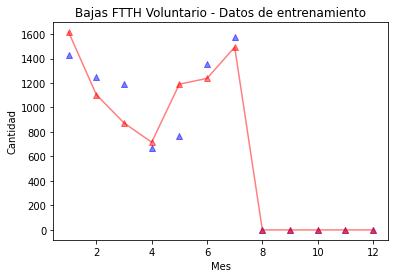

In [23]:
#Gráfica
fig, ax = plt.subplots()
for ciclo in list(range (año,año+1)):   
  if ciclo == año:      
    marca ="^"
  else:
    print ('cero')
    marca ="o"
  ax.scatter(
    x_g[:],    
    y_g[:],
    c="Blue",
    marker = marca,
    label = ciclo,
    alpha=0.5)
  ax.plot(
    x_g[:],    
    y_g_p[:],
    c="Red",
    marker = marca,
    label = ciclo,
    alpha=0.5)
#plt.legend()
plt.title("Bajas FTTH Voluntario - Datos de entrenamiento")
plt.xlabel ("Mes")
plt.ylabel ("Cantidad" )
plt.show()

In [24]:
cont_reg=0
año=2020
acum1=0
acum2=0
acum3=0
acum4=0
acum5=0
acum6=0
acum7=0
acum8=0
acum9=0
acum10=0
acum11=0
acum12=0
acump1=0
acump2=0
acump3=0
acump4=0
acump5=0
acump6=0
acump7=0
acump8=0
acump9=0
acump10=0
acump11=0
acump12=0
for _ in x_test[:,1]:
  if x_test[cont_reg,0] == año:
    if x_test[cont_reg,1]== 1:
      acum1=acum1+ y_test[cont_reg]
      acump1=acump1+ y_predic_test[cont_reg]      
    else:
      if x_test[cont_reg,1]== 2:
        acum2=acum2+ y_test[cont_reg]
        acump2=acump2+ y_predic_test[cont_reg]       
      else:
        if x_test[cont_reg,1]== 3:
          acum3=acum3+ y_test[cont_reg]
          acump3=acump3+ y_predic_test[cont_reg]      
        else:
          if x_test[cont_reg,1]== 4:
            acum4=acum4+ y_test[cont_reg]
            acump4=acump4+ y_predic_test[cont_reg]      
          else:
            if x_test[cont_reg,1]== 5:
              acum5=acum5+ y_test[cont_reg]
              acump5=acump5+ y_predic_test[cont_reg]       
            else:
              if x_test[cont_reg,1]== 6:
                acum6=acum6+ y_test[cont_reg]
                acump6=acump6+ y_predic_test[cont_reg]       
              else:
                if x_test[cont_reg,1]== 7:
                  acum7=acum7+ y_test[cont_reg]
                  acump7=acump7+ y_predic_test[cont_reg]       
                else:
                  if x_test[cont_reg,1]== 8:
                    acum8=acum8+ y_test[cont_reg]
                    acump8=acump8+ y_predic_test[cont_reg]       
                  else:
                    if x_test[cont_reg,1]== 9:
                      acum9=acum9+ y_test[cont_reg]
                      acump9=acump9+ y_predic_test[cont_reg]      
                    else:
                      if x_test[cont_reg,1]== 10:
                        acum10=acum10+ y_test[cont_reg]
                        acump10=acump10+ y_predic_test[cont_reg]       
                      else:
                        if x_test[cont_reg,1]== 11:
                          acum11=acum11+ y_test[cont_reg]
                          acump11=acump11+ y_predic_test[cont_reg]       
                        else:
                          if x_test[cont_reg,1]== 12:
                            acum12=acum12+ y_test[cont_reg]     
                            acump12=acump12+ y_predic_test[cont_reg]        
  else:
      pass
  cont_reg=cont_reg+1
x_g_t, y_g_t, y_g_p_t = [],[],[]
for _ in range(1,13):
  x_g_t.append(_)   
  if _ == 1:
    y_g_t.append(acum1)
    y_g_p_t.append(acump1)    
  if _== 2:
    y_g_t.append(acum2)
    y_g_p_t.append(acump2)
  if _== 3:
    y_g_t.append(acum3)
    y_g_p_t.append(acump3)
  if _ == 4:
    y_g_t.append(acum4)
    y_g_p_t.append(acump4)
  if _== 5:
    y_g_t.append(acum5)
    y_g_p_t.append(acump5)
  if _== 6:
    y_g_t.append(acum6)
    y_g_p_t.append(acump6)
  if _ ==7:
    y_g_t.append(acum7)
    y_g_p_t.append(acump7)
  if _== 8:
    y_g_t.append(acum8)
    y_g_p_t.append(acump8)
  if _== 9:
    y_g_t.append(acum9)
    y_g_p_t.append(acump9)
  if _== 10:
    y_g_t.append(acum10)
    y_g_p_t.append(acump10)
  if _== 11:
    y_g_t.append(acum11)
    y_g_p_t.append(acump11)
  if _== 12:
    y_g_t.append(acum12) 
    y_g_p_t.append(acump12)
  

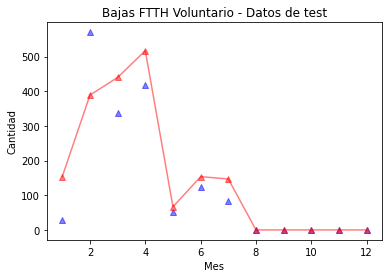

In [25]:
#Gráfica datos test
fig, ax = plt.subplots()
for ciclo in list(range (año,año+1)):   
  if ciclo == año:      
    marca ="^"
  else:
    print ('cero')
    marca ="o"
  ax.scatter(
    x_g_t[:],    
    y_g_t[:],
    c="Blue",
    marker = marca,
    label = ciclo,
    alpha=0.5)
  ax.plot(
    x_g_t[:],    
    y_g_p_t[:],
    c="Red",
    marker = marca,
    label = ciclo,
    alpha=0.5)
#plt.legend()
plt.title("Bajas FTTH Voluntario - Datos de test")
plt.xlabel ("Mes")
plt.ylabel ("Cantidad" )
plt.show()

In [26]:
#Datos a predecir
c_anio = ["2020"] * 35
c_mes = ["8"] * 7 + ["9"] * 7 + ["10"] * 7 + ["11"] * 7 + ["12"] * 7
c_antiguedad = [1,2,3,4,5,6,7] + [1,2,3,4,5,6,7] +[1,2,3,4,5,6,7] +[1,2,3,4,5,6,7] +[1,2,3,4,5,6,7]  
df2 = pd.DataFrame({"Año": c_anio, "Mes": c_mes, "Antiguedad": c_antiguedad})

In [27]:
df2['Año'] = df2['Año'].astype('int64')
df2['Mes'] = df2['Mes'].astype('int64')
df2['Antiguedad'] = df2['Antiguedad'].astype('int64')

In [28]:
df2.dtypes

Año           int64
Mes           int64
Antiguedad    int64
dtype: object

In [29]:
x2= df2.iloc[:,:].values
x2=np.array(x2)

In [30]:
x_poly_p = poly_reg.fit_transform(x2)
y_predic_x2 = lineal_poly.predict(x_poly_p)

In [31]:
pd.DataFrame(x2).head(5)

,0,1,2
0,2020,8,1
1,2020,8,2
2,2020,8,3
3,2020,8,4
4,2020,8,5


In [33]:
#Gráfico datos predicción
cont_reg=0
año=2020
acumNp1=0
acumNp2=0
acumNp3=0
acumNp4=0
acumNp5=0
acumNp6=0
acumNp7=0
acumNp8=0
acumNp9=0
acumNp10=0
acumNp11=0
acumNp12=0
for _ in x2[:,1]:
  if x2[cont_reg,0] == año:
    if x2[cont_reg,1]== 1:
      acumNp1=acumNp1+ y_predic_x2[cont_reg]      
    else:
      if x2[cont_reg,1]== 2:
        acumNp2=acumNp2+ y_predic_x2[cont_reg]       
      else:
        if x2[cont_reg,1]== 3:
          acumNp3=acumNp3+ y_predic_x2[cont_reg]           
        else:
          if x2[cont_reg,1]== 4:
            acumNp4=acumNp4+ y_predic_x2[cont_reg]               
          else:
            if x2[cont_reg,1]== 5:
              acumNp5=acumNp5+ y_predic_x2[cont_reg]              
            else:
              if x2[cont_reg,1]== 6:
                acumNp6=acumNp6+ y_predic_x2[cont_reg]                   
              else:
                if x2[cont_reg,1]== 7:
                  acumNp7=acumNp7+ y_predic_x2[cont_reg]                    
                else:
                  if x2[cont_reg,1]== 8:
                    acumNp8=acumNp8+ y_predic_x2[cont_reg]  
                                     
                  else:
                    if x2[cont_reg,1]== 9:
                      acumNp9=acumNp9+ y_predic_x2[cont_reg]                       
                    else:
                      if x2[cont_reg,1]== 10:
                        acumNp10=acumNp10+ y_predic_x2[cont_reg]                        
                      else:
                        if x2[cont_reg,1]== 11:
                          acumNp11=acumNp11+ y_predic_x2[cont_reg]                             
                        else:
                          if x2[cont_reg,1]== 12:
                            acumNp12=acumNp12+ y_predic_x2[cont_reg]  
                            print(y_predic_x2[cont_reg] )  
                               
  else:
      pass
  cont_reg=cont_reg+1
x2_p, y2_p = [],[] 
for _ in range(8,13):
  x2_p.append(_)
  if _ == 1:
    y2_p.append(acumNp1)    
  if _== 2:
    y2_p.append(acumNp2)    
  if _== 3:
    y2_p.append(acumNp3)    
  if _ == 4:
    y2_p.append(acumNp4)    
  if _== 5:
    y2_p.append(acumNp5)    
  if _== 6:
    y2_p.append(acumNp6)    
  if _ ==7:
    y2_p.append(acumNp7)    
  if _== 8:
    y2_p.append(acumNp8)    
  if _== 9:
    y2_p.append(acumNp9)    
  if _== 10:
    y2_p.append(acumNp10)    
  if _== 11:
    y2_p.append(acumNp11)    
  if _== 12:
    y2_p.append(acumNp12)     

[599.56755779]
[444.23993444]
[461.22678995]
[588.12920703]
[762.5482684]
[922.08505677]
[1004.34065487]


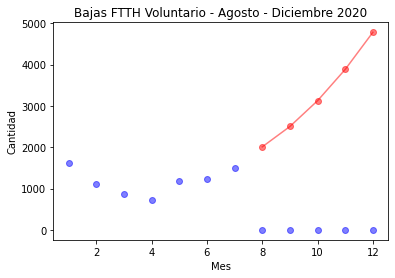

In [34]:
#Gráfica datos predicción
fig, ax = plt.subplots()
for ciclo in list(range (año,año+1)):   
  if ciclo == año:      
    marca ="o"
  else:
    print ('cero')
    marca ="o"  
  ax.scatter(
    x_g[:],    
    y_g_p[:],
    c="Blue",
    marker = marca,
    label = ciclo,
    alpha=0.5)
  ax.plot(
    x2_p[:],    
    y2_p[:],
    c="Red",
    marker = marca,
    label = ciclo,
    alpha=0.5)
#plt.legend()
plt.title("Bajas FTTH Voluntario - Agosto - Diciembre 2020")
plt.xlabel ("Mes")
plt.ylabel ("Cantidad" )
plt.show()

In [35]:
grupo.corr(method ='pearson')

,Año,Mes,Antiguedad,Cant_Bajas
Año,1.000000,-3.729741e-01,0.000000e+00,0.000419
Mes,-0.372974,1.000000e+00,-2.065386e-18,-0.032045
Antiguedad,0.000000,-2.065386e-18,1.000000e+00,0.701732
Cant_Bajas,0.000419,-3.204475e-02,7.017319e-01,1.000000


In [36]:
print('Datos del modelo de Regresión')
print()
print('"Valor de la pendiente o coeficiente "a":')
pd.DataFrame(lineal_poly.coef_)

Datos del modelo de Regresión

"Valor de la pendiente o coeficiente "a":


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.000982,0.067432,0.120519,-0.000004,68.345537,121.658602,-15442.261606,-9985.91425,-24288.851005,0.000023,-0.033835,-0.060302,7.646546,4.930891,12.084241,0.119376,0.572859,2.270032,-10.39982


In [37]:
print('"Valor de la Intersección "b":')
pd.DataFrame(lineal_poly.intercept_)

"Valor de la Intersección "b":


,0
0,-190507.569474
